# Домашнее задание 

В этом задании мы попрактикуемся в методах снижения размерности и кластеризации данных. 

Мы будем работать с набором данных Samsung Human Activity Recognition. Скачайте данные по ссылке https://yadi.sk/d/_WFxgSIuBF06Rg. Данные поступают с акселерометров и гироскопов мобильных телефонов Samsung Galaxy S3, также известен вид активности человека с телефоном в кармане – ходил ли он, стоял, лежал, сидел или шел вверх/вниз по лестнице.

Представим, что вид активности нам неизвестнен, и попробуем кластеризовать людей чисто на основе имеющихся признаков.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
from tqdm import tqdm_notebook

%matplotlib inline
from matplotlib import pyplot as plt
plt.style.use(['seaborn-darkgrid'])
plt.rcParams['figure.figsize'] = (12, 9)
plt.rcParams['font.family'] = 'DejaVu Sans'

from sklearn import metrics
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering,Birch,MeanShift
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn import metrics


RANDOM_STATE = 123

In [4]:
X_train = np.loadtxt("samsung_HAR/samsung_HAR/samsung_train.txt")
y_train = np.loadtxt("samsung_HAR/samsung_HAR/samsung_train_labels.txt").astype(int)

X_test = np.loadtxt("samsung_HAR/samsung_HAR/samsung_test.txt")
y_test = np.loadtxt("samsung_HAR/samsung_HAR/samsung_test_labels.txt").astype(int)

In [5]:
X_test.shape

(2947, 561)

Для кластеризации нам не нужен вектор ответов. Объедините обучающую и тестовую выборки.

In [6]:
X = pd.concat([pd.DataFrame(X_train), pd.DataFrame(X_test)])
y =pd.concat([pd.DataFrame(y_train), pd.DataFrame(y_test)])

In [7]:
np.unique(y)

array([1, 2, 3, 4, 5, 6])

Эти метки соответствуют:

1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию

## Масштабирование данных с помощью StandardScaler

Отмасштабируйте выборку с помощью StandardScaler.

In [8]:
scaler=StandardScaler().fit(X)
X_scaled=scaler.transform(X)
X_scaled

array([[ 2.10533854e-01, -6.87026385e-02, -4.52194533e-01, ...,
        -6.74432366e-01,  3.82007658e-01, -1.61505480e-02],
       [ 6.02084832e-02,  3.59023537e-02, -2.75221885e-01, ...,
        -6.81359801e-01,  3.83147865e-01, -1.20627169e-04],
       [ 7.84597052e-02, -4.64269585e-02, -8.55480582e-02, ...,
        -6.89470939e-01,  3.84288531e-01,  1.92144041e-02],
       ...,
       [ 1.11821625e+00,  1.28805864e+00, -1.29414692e-01, ...,
        -3.10750224e-01,  6.91509049e-01,  8.75719123e-01],
       [-5.43492722e-01,  9.75327452e-01,  2.34319837e-01, ...,
        -3.19283719e-01,  6.59762215e-01,  8.99444350e-01],
       [-1.78515253e+00, -1.86663622e-02, -5.29759691e-01, ...,
        -3.19991245e-01,  6.56994458e-01,  9.01454465e-01]])

## Понижение размерности с помощью PCA

Понижаем размерность с помощью PCA, оставляя столько компонент, сколько нужно для того, чтобы объяснить как минимум 90% дисперсии исходных (отмасштабированных) данных. Используйте отмасштабированную выборку и зафиксируйте random_state.

In [9]:
pca = PCA(0.9,random_state=123)
X_pca = pca.fit_transform(X_scaled)
len(pca.components_)

65

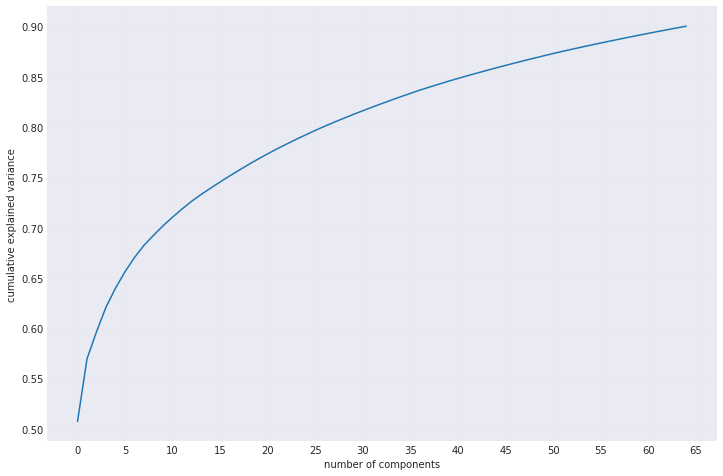

In [10]:
plt.figure(figsize=(12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.xticks(np.arange(0, 70, step=5))
plt.grid(visible=True,linewidth=1,color='black',which='both', alpha=0.01)

Визуализируйте данные в проекции на первые две главные компоненты.

Text(0, 0.5, 'y')

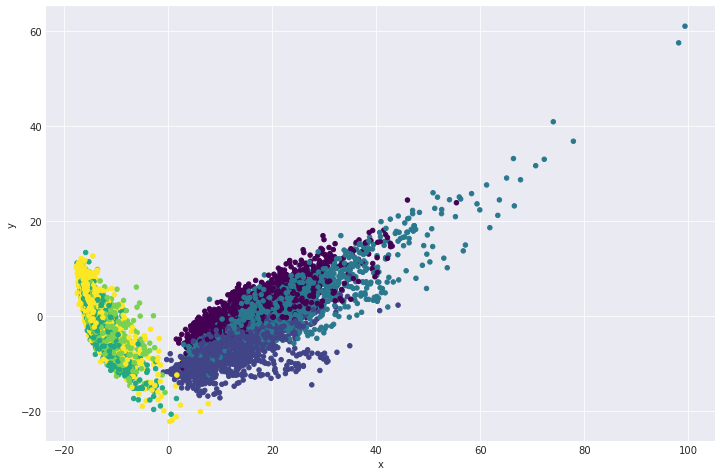

In [11]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=y, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [12]:
X_pca[:,0]

array([-16.38097982, -15.58217328, -15.42398918, ...,  11.84685312,
         8.20668637,   9.31117251])

## KMeans

Сделайте кластеризацию данных методом KMeans, обучив модель на данных со сниженной за счет PCA размерностью. В данном случае нужно искать 6 кластеров (так как у нас 6 классов).

Параметры:

n_clusters = n_classes (число уникальных меток целевого класса)

n_init = 100

random_state = RANDOM_STATE (для воспроизводимости результата)

In [ ]:
n_classes=len(np.unique(y))
n_classes

In [ ]:
kmeans=KMeans(n_clusters=n_classes,n_init=100,random_state=123)
kmeans.fit(X_pca)
kmeans.labels_

Визуализируйте данные в проекции на первые две главные компоненты. Раскрасьте точки в соответствии с полученными метками кластеров.

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=kmeans.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Выведите на экран значения метрик качества кластеризации

In [ ]:
result=result.drop

In [ ]:
d={'model':['kmeans'],'Homogeneity':[metrics.homogeneity_score(y[0], kmeans.labels_)],
   'Completeness':[metrics.completeness_score(y[0], kmeans.labels_)],
   'V-measure':[metrics.v_measure_score(y[0], kmeans.labels_)],
  'Adjusted Rand-Index':[metrics.adjusted_rand_score(y[0], kmeans.labels_)],
   'Adjusted mutual info score':[metrics.adjusted_mutual_info_score(y[0], kmeans.labels_)],
   'Silhouette Coefficient':[metrics.silhouette_score(X_pca, kmeans.labels_, sample_size=1000)]}
result=pd.DataFrame(data=d)

print("Homogeneity: %0.3f" % result[result.model == 'kmeans']['Homogeneity'])
print("Completeness: %0.3f" % result[result.model == 'kmeans']['Completeness'])
print("V-measure: %0.3f" % result[result.model == 'kmeans']['V-measure'])
print("Adjusted Rand-Index: %.3f"
      % result[result.model == 'kmeans']['Adjusted Rand-Index'])
print("Adjusted mutual info score: %.3f"
      % result[result.model == 'kmeans']['Adjusted mutual info score'])

print("Silhouette Coefficient: %0.3f"
      % result[result.model == 'kmeans']['Silhouette Coefficient'])

In [ ]:
result

## AgglomerativeClustering

Теперь попробуем сделать кластеризацию с помощью AgglomerativeClustering (https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html)

In [ ]:
ag = AgglomerativeClustering(n_clusters=n_classes, 
                             linkage='ward').fit(X_pca)

In [ ]:
ag.labels_

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=ag.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

Выведите метрики качества для полученного разбиения на кластеры. Сравните с kmeans. Запишите выводы!

In [ ]:
result = result.append(pd.DataFrame([['AgglomerativeClustering',
                                      metrics.homogeneity_score(y[0], ag.labels_),
                                      metrics.completeness_score(y[0], ag.labels_),
                                      metrics.v_measure_score(y[0], ag.labels_),
                                      metrics.adjusted_rand_score(y[0], ag.labels_),
                                      metrics.adjusted_mutual_info_score(y[0], ag.labels_),
                                      metrics.silhouette_score(X_pca, ag.labels_, sample_size=1000)]], columns
=result.columns),ignore_index=True)

print("Homogeneity: %0.3f" % result[result.model == 'AgglomerativeClustering']['Homogeneity'])
print("Completeness: %0.3f" % result[result.model == 'AgglomerativeClustering']['Completeness'])
print("V-measure: %0.3f" % result[result.model == 'AgglomerativeClustering']['V-measure'])
print("Adjusted Rand-Index: %.3f"
      % result[result.model == 'AgglomerativeClustering']['Adjusted Rand-Index'])
print("Adjusted mutual info score: %.3f"
      % result[result.model == 'AgglomerativeClustering']['Adjusted mutual info score'])

print("Silhouette Coefficient: %0.3f"
      % result[result.model == 'AgglomerativeClustering']['Silhouette Coefficient'])

In [ ]:
result

Cluster Homogeneity (однородность кластеров): значение метрики качества должно уменьшаться при объединении в один кластер двух эталонных
Cluster Completeness (полнота кластеров): это свойство, двойственное свойству однородности. Значение метрики качества должно уменьшаться при разделении эталонного кластера на части
V-мера  функция агрегирования является средним арифметическим
Индекс Rand функция, которая измеряет сходство двух назначений, игнорируя перестановки


**Вывод:** оба алгоритма (kmeans,AgglomerativeClustering) показывают среднее качество кластеризации. По внешним метрикам (Homogeneity,Completeness,V-measure,Adjusted Rand-Index,Adjusted mutual info score) качество незначительно лучше при иерархической кластеризации. Значения внешних метрик говорят нам и о объединении в один кластер двух эталонных и разделении эталонного кластера на части. Внутренняя метрика (Silhouette Coefficient) незначительно лучше в алгоритме k-средних, но для обоих алгоритмов она низкая и говорит о наличии перекрывающихся кластеров.

Попробуйте применить другие методы кластеризации из sklearn. Также вычислите метрики качества и сделайте вывод о том, какой метод сработал лучше.

## SpectralClustering

In [ ]:

sc = SpectralClustering(n_clusters=n_classes,assign_labels='kmeans',random_state=123,
                        n_init=100,affinity='nearest_neighbors').fit(X_pca)
np.unique(sc.labels_)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=sc.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
result = result.append(pd.DataFrame([['SpectralClustering',
                                      metrics.homogeneity_score(y[0], sc.labels_),
                                      metrics.completeness_score(y[0], sc.labels_),
                                      metrics.v_measure_score(y[0], sc.labels_),
                                      metrics.adjusted_rand_score(y[0], sc.labels_),
                                      metrics.adjusted_mutual_info_score(y[0], sc.labels_),
                                      metrics.silhouette_score(X_pca, sc.labels_, sample_size=1000)]], columns
=result.columns),ignore_index=True)

print("Homogeneity: %0.3f" % result[result.model == 'SpectralClustering']['Homogeneity'])
print("Completeness: %0.3f" % result[result.model == 'SpectralClustering']['Completeness'])
print("V-measure: %0.3f" % result[result.model == 'SpectralClustering']['V-measure'])
print("Adjusted Rand-Index: %.3f"
      % result[result.model == 'SpectralClustering']['Adjusted Rand-Index'])
print("Adjusted mutual info score: %.3f"
      % result[result.model == 'SpectralClustering']['Adjusted mutual info score'])

print("Silhouette Coefficient: %0.3f"
      % result[result.model == 'SpectralClustering']['Silhouette Coefficient'])

In [ ]:
result

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN

plt.figure(figsize= (15,23))
i = 1
for samples in [1, 3, 5]:
    for e in [5, 7, 10, 12, 15]:
        dbscan = DBSCAN(eps=e, min_samples=samples)
        clusters = dbscan.fit_predict(X_pca)
        plt.subplot(6, 3, i)
        plt.scatter(X_pca[:,0], X_pca[:,1], c = clusters)
        plt.title('eps = {}, min_samples = {}'.format(e, samples))
        #plt.colorbar(ticks=clusters)
        i += 1
    i+=1

plt.show()

In [ ]:
dbscan = DBSCAN(eps=12, min_samples=1).fit(X_pca)
dbscan.labels_

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=dbscan.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
result = result.append(pd.DataFrame([['DBSCAN',
                                      metrics.homogeneity_score(y[0], dbscan.labels_),
                                      metrics.completeness_score(y[0], dbscan.labels_),
                                      metrics.v_measure_score(y[0], dbscan.labels_),
                                      metrics.adjusted_rand_score(y[0], dbscan.labels_),
                                      metrics.adjusted_mutual_info_score(y[0], dbscan.labels_),
                                      metrics.silhouette_score(X_pca, dbscan.labels_, sample_size=1000)]], columns
=result.columns),ignore_index=True)

print("Homogeneity: %0.3f" % result[result.model == 'DBSCAN']['Homogeneity'])
print("Completeness: %0.3f" % result[result.model == 'DBSCAN']['Completeness'])
print("V-measure: %0.3f" % result[result.model == 'DBSCAN']['V-measure'])
print("Adjusted Rand-Index: %.3f"
      % result[result.model == 'DBSCAN']['Adjusted Rand-Index'])
print("Adjusted mutual info score: %.3f"
      % result[result.model == 'DBSCAN']['Adjusted mutual info score'])

print("Silhouette Coefficient: %0.3f"
      % result[result.model == 'DBSCAN']['Silhouette Coefficient'])

In [ ]:
result

## MeanShift

In [ ]:
ms = MeanShift(cluster_all=True).fit(X_pca)
np.unique(ms.labels_)

In [ ]:
plt.figure(figsize=(12,8))
plt.scatter(X_pca[:,0], X_pca[:,1], c=ms.labels_, s=20, cmap='viridis')
plt.xlabel('x')
plt.ylabel('y')

In [ ]:
result = result.append(pd.DataFrame([['MeanShift',
                                      metrics.homogeneity_score(y[0], ms.labels_),
                                      metrics.completeness_score(y[0], ms.labels_),
                                      metrics.v_measure_score(y[0], ms.labels_),
                                      metrics.adjusted_rand_score(y[0], ms.labels_),
                                      metrics.adjusted_mutual_info_score(y[0], ms.labels_),
                                      metrics.silhouette_score(X_pca, ms.labels_, sample_size=1000)]], columns
=result.columns),ignore_index=True)

print("Homogeneity: %0.3f" % result[result.model == 'MeanShift']['Homogeneity'])
print("Completeness: %0.3f" % result[result.model == 'MeanShift']['Completeness'])
print("V-measure: %0.3f" % result[result.model == 'MeanShift']['V-measure'])
print("Adjusted Rand-Index: %.3f"
      % result[result.model == 'MeanShift']['Adjusted Rand-Index'])
print("Adjusted mutual info score: %.3f"
      % result[result.model == 'MeanShift']['Adjusted mutual info score'])

print("Silhouette Coefficient: %0.3f"
      % result[result.model == 'MeanShift']['Silhouette Coefficient'])

In [ ]:
result

## Выводы

Для самой успешной из полученных кластеризаций попробуйте дать интерпретацию кластеров. Опишите характеристики объектов, попавших в каждый кластер. Для этого можете ответить на следующие вопросы:

* похожи ли объекты внутри каждого кластера на определенный тип активности человека?
* в каких кластерах смешано несколько типов активности? С чем, на ваш взгляд, это может быть связано?
* качественная ли получилась кластеризация? На основании чего вы можете сделать такой вывод?

**Интерпретация кластеров**

Выберем для детального анализа результаты иерархической кластеризации AgglomerativeClustering. Создадим таблицу кластеризации и посмотрим на результаты (метки:
1 - ходьбе,
2 - подъему вверх по лестнице,
3 - спуску по лестнице,
4 - сидению,
5 - стоянию,
6 - лежанию)

In [ ]:
AgglomerativeClusteringResult = pd.crosstab(y[0], ag.labels_, margins=True)
AgglomerativeClusteringResult.index = ['ходьба', 'подъем вверх по лестнице', 
             'спуск по лестнице', 'сидение', 'стояние', 'лежание', 'все']
AgglomerativeClusteringResult.columns = ['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','все']

AgglomerativeClusteringResult

Глядя на таблицу видно: что алгоритм попытался определить активности, но сделал это очень плохо:
 - во-первых, один вид активности разбросан по нескольким кластерам,
 - во-вторых, во всех кластерах, кроме 1, не правильно определен основной класс активности.  
 
В каких-то случаях ошибки можно объяснить, возможно по данным девайсов ходьба и спуск по лестнице похожи, или стояние и лежание. Но например сидение, лежание на мой взгляд сложно перепутать с подъемом вверх по лестнице.

Кластеризация получилась некачественная, это видно и по оценкам и по кросс-таблице.